In [ ]:
# Some more data explorations

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# REPLACE THE FILE WITH CORRECT PATH
file = "data/20230307_UkraineCombinedTweetsDeduped.csv"

In [26]:
df = pd.read_csv(file)
# rename the unnamed column
df.rename( columns={'Unnamed: 0':'UID'}, inplace=True )

df.head()

,UID,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,180504,1.282574e+18,ripetvnews,Latest and Breaking News and Updates from all ...,NaN,4,197,3331,2020-07-13 07:16:00,1.632894e+18,...,0.0,NaN,0.0,0.0,NaN,False,0.0,0.0,NaN,2023-03-07 08:49:00.015526
1,180505,8.546982e+07,UNmigration,"Official account of IOM | Promoting safe, regu...","Ginevra, Svizzera",3506,216820,36260,2009-10-27 01:32:17,1.632894e+18,...,0.0,NaN,0.0,0.0,NaN,False,0.0,0.0,NaN,2023-03-07 03:36:09.199785
2,180506,8.247188e+07,zamoca,"Asa Grait-a Zamolxis, a Dacian ancient God who...",Parallel Metaverse,128,297,8728,2009-10-14 22:21:39,1.632894e+18,...,0.0,NaN,0.0,0.0,NaN,False,0.0,0.0,NaN,2023-03-07 03:36:09.188978
3,180507,1.524004e+18,pravda_eng,Official English page of Ukrainian media outle...,Ukraine,50,51589,13499,2022-05-10 14:25:11,1.632894e+18,...,0.0,NaN,0.0,0.0,NaN,False,0.0,0.0,NaN,2023-03-07 07:11:56.376415
4,180508,1.235245e+18,InformazioneA,Aggiornamenti e podcast dedicati a questioni i...,NaN,107,1290,24235,2020-03-04 16:43:53,1.632894e+18,...,0.0,NaN,0.0,0.0,NaN,False,0.0,0.0,NaN,2023-03-07 07:33:06.572288


In [23]:
# get shape of the DataFrame
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

155202 rows and 29 columns


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155202 entries, 0 to 155201
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   UID                      155202 non-null  int64  
 1   userid                   155202 non-null  float64
 2   username                 155202 non-null  object 
 3   acctdesc                 121861 non-null  object 
 4   location                 91204 non-null   object 
 5   following                155202 non-null  int64  
 6   followers                155202 non-null  int64  
 7   totaltweets              155202 non-null  int64  
 8   usercreatedts            155202 non-null  object 
 9   tweetid                  155202 non-null  float64
 10  tweetcreatedts           155202 non-null  object 
 11  retweetcount             155202 non-null  int64  
 12  text                     155202 non-null  object 
 13  hashtags                 155202 non-null  object 
 14  lang

In [28]:
# Change the dtypes of usercreatedts, tweetcreatedts, and extractedts to datetime64 for easier operation later.
df["usercreatedts"] = pd.to_datetime(df["usercreatedts"])
df["tweetcreatedts"] = pd.to_datetime(df["tweetcreatedts"])
df["extractedts"] = pd.to_datetime(df["extractedts"])

# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155202 entries, 0 to 155201
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   UID                      155202 non-null  int64         
 1   userid                   155202 non-null  float64       
 2   username                 155202 non-null  object        
 3   acctdesc                 121861 non-null  object        
 4   location                 91204 non-null   object        
 5   following                155202 non-null  int64         
 6   followers                155202 non-null  int64         
 7   totaltweets              155202 non-null  int64         
 8   usercreatedts            155202 non-null  datetime64[ns]
 9   tweetid                  155202 non-null  float64       
 10  tweetcreatedts           155202 non-null  datetime64[ns]
 11  retweetcount             155202 non-null  int64         
 12  text            

In [29]:
earliest_tweet = df["tweetcreatedts"].min()
latest_tweet = df["tweetcreatedts"].max()

print(f"The earliest tweet was at {earliest_tweet}, and the latest was at {latest_tweet}")

The earliest tweet was at 2023-03-07 00:00:00, and the latest was at 2023-03-07 23:59:59


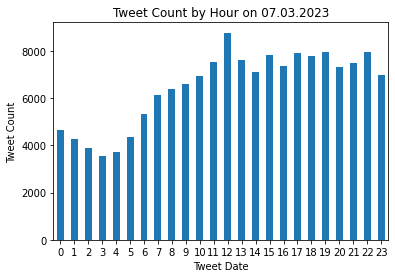

In [39]:
# get dates in the dataframe
dates = df["tweetcreatedts"].dt.hour
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar();

plt.title("Tweet Count by Hour on 07.03.2023")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

In [33]:
print(f"There are {df['language'].nunique()} unique languages in this DataFrame.")
df["language"].unique()

There are 61 unique languages in this DataFrame.


array(['en', 'es', 'fr', 'eu', 'de', 'ru', 'und', 'in', 'it', 'uk', 'cs',
       'pl', 'fa', 'th', 'sl', 'nl', 'bg', 'zh', 'pt', 'hi', 'iw', 'ja',
       'tr', 'ro', 'vi', 'ar', 'el', 'fi', 'ca', 'ht', 'sv', 'no', 'ur',
       'cy', 'kn', 'tl', 'is', 'lv', 'ko', 'lt', 'bn', 'ta', 'my', 'da',
       'gu', 'te', 'et', 'sr', 'km', 'si', 'ne', 'ka', 'ml', 'am', 'sd',
       'mr', 'pa', 'hu', 'ps', 'or', 'hy'], dtype=object)

In [34]:
print(f"{round(df.loc[df['language']=='en'].shape[0]/df.shape[0]*100, 2)}% of the tweets are in English.")

57.55% of the tweets are in English.


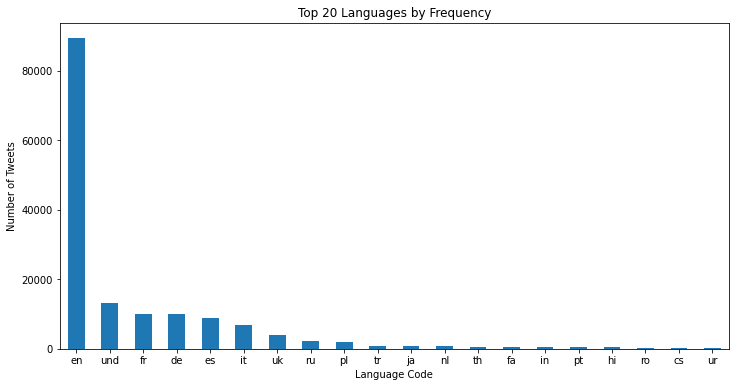

In [40]:
language_counts = df.groupby("language").size().sort_values(ascending=False)[0:20].plot.bar(figsize=(12,6),
                 title="Top 20 Languages by Frequency",
                 xlabel="Language Code",
                 ylabel="Number of Tweets",
                 rot=90
                 );

plt.xticks(rotation=0)
plt.show()

In [37]:
# pull the rows for which their language code is "und" or undefined
language_und = df.loc[df["language"]=="und"]
# show full length of the text without truncating (...)
pd.set_option('display.max_colwidth', None)
# show tweets
language_und["text"]

17                                                  @ZelenskyyUa #GloryToUkraine #RussiaIsATerroristState
29                                                          @ukrainiansquad #SlavaUkraini \n#HeroyamSlava
48                                                                           #Слава_Україні #SlavaUkraini
54        #Celtics #Cavaliers #ChrisEvans #GloryToUkraine #NewZealand #NewTwitter https://t.co/58QS81XtBJ
57                                                                  #SlavaUkraini https://t.co/geIcAU7Lfl
                                                       ...                                               
155156                       #Georgia 🇬🇪✊🏻\n\n📷 @nexta_tv https://t.co/ZuZECKrmTV https://t.co/KrxCueDCbd
155160                       #Georgia 🇬🇪✊🏻\n\n📷 @nexta_tv https://t.co/ZuZECKrmTV https://t.co/KrxCueDCbd
155186                                                               #Tbilisi #EU https://t.co/H7q99mjof1
155192                                        